In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

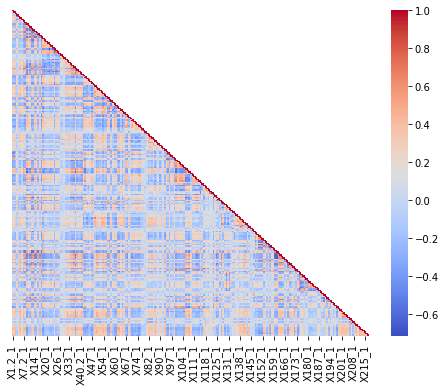

In [238]:
# your correlation matrix
df = pd.read_csv(os.path.expanduser('~/Desktop/Controlparticipants_Clusters_20.csv'))
df1 = df.drop(['Unnamed: 1','cluster'], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df1, yticklabels=False,cmap='coolwarm')

In [239]:
# turn it into a dissimilarity matrix (based on correlation distance, 1-r)
corr = df1.values
dsm1 = 1-corr

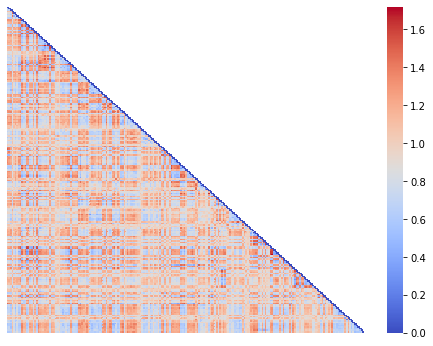

In [240]:
# plot your DSM 
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dsm1, yticklabels=False,xticklabels=False,cmap='coolwarm')

In [241]:
cluster_labels = df['cluster']

Text(0.5, 1, 'survey question correlation distance')

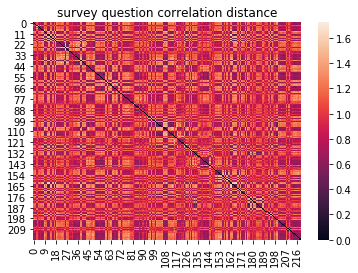

In [242]:
raw_responses = pd.read_csv(os.path.expanduser('~/Desktop/Responses_cleaned_control_April2020.csv'))
# transpose the data so that the questions are the features and the responses are samples
# so you wind up doing the DSM across question responses
# this shows us what question each value is (now columns are responses)
# and match clusters to questions
raw_df = raw_responses.T.set_index(cluster_labels)
across_question_correlations = squareform(pdist(raw_df.values,'correlation'))
sns.heatmap(across_question_correlations)
plt.title('survey question correlation distance')

In [243]:
# figure out which question was in which cluster
cluster_number = pd.unique(cluster_labels)
cluster_labels = cluster_labels.to_list()

In [254]:
# within-cluster RDMs
# go through each cluster, pull out all questions in that cluster, and compute an RDM over their responses
within_RDMs = []
for c in cluster_number: 
    indices = (cluster_labels == c) # just figure out where in the raw responses that question is
    # this gives us how correlated those questions are with all the questions in the survey
    cluster_correlations = across_question_correlations[indices]
    # transposing so that the questions are features and the correlation values are samples 
    within_RDMs.append(pdist(cluster_correlations.T, 'correlation')) # correlation distance 

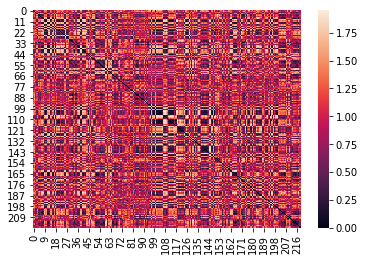

In [255]:
# if we visualize one of those, you get the representational dissimilarity matrix of all the questions 
# within that one cluster
x = within_RDMs[0]
y = within_RDMs[4]
sns.heatmap(squareform(x))

Text(0.5, 1, 'question cluster RDM')

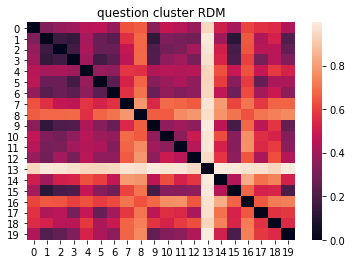

In [245]:
# compute RDMs across clusters - correlation distance of each cluster from each other cluster
within_cluster_RDMs = np.array(within_RDMs)
cluster_by_cluster_RDM = squareform(pdist(within_cluster_RDMs,'correlation'))
sns.heatmap(cluster_by_cluster_RDM)
plt.title('question cluster RDM')

In [7]:
# create 100 random matrices of 200 features, 100 samples; display one of them
random_matrices = [np.random.rand(100,200) for i in range(100)]

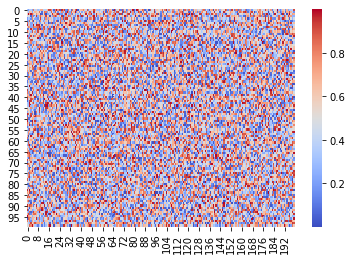

In [8]:
sns.heatmap(random_matrices[0],cmap='coolwarm')

In [28]:
# This will create a second-order RDM; comparing the similarity structure within a cluster to
# that of other clusters, given our random dataset.

In [29]:
# create arbitrary feature clusters ; 5 consecutive features per cluster, 40 clusters
clusters = np.array_split(np.arange(200), 40)
# loop through all clusters; create one RDM per cluster
rdms = []
for cluster in clusters:
    # get all the cluster data for each matrix in the cluster; vectorize
    # becomes (100, 1000) - one vectorized cluster per matrix
    cluster_data = np.array([mat[:,cluster].ravel() for mat in random_matrices])
    dsm = pdist(cluster_data, 'correlation') # dissimilarity between each cluster
    # if you want it in squareform, can do:
    #dsm_sq = squareform(dsm)
    # but as is, each DSM is the vectorized lower triangle of a correlation distance matrix
    rdms.append(dsm)

# this gives you a RDM for each cluster. (vectorized)
rdms = np.array(rdms)
cluster_rdm = squareform(pdist(rdms, 'correlation'))


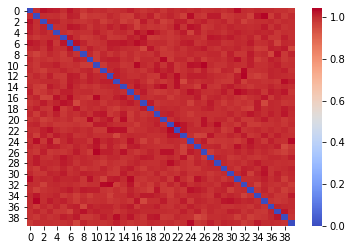

In [30]:
# since there's no structure to this data, the correlation distance between things is nearly always 1 - no correlation
# aside from along the diagonal
sns.heatmap(cluster_rdm, cmap='coolwarm')

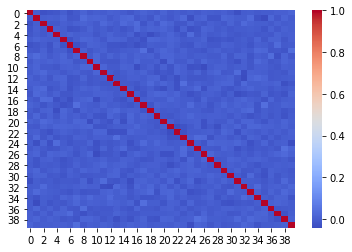

In [31]:
# can flip it to correlation
sns.heatmap(1-cluster_rdm, cmap='coolwarm')